In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2


#### Answer1.

In [12]:
import math
def conv_filter(img,mask):
    
    [rows,cols] = img.shape
    out_img = np.zeros([rows,cols],dtype='float')
    
    
    window_size = mask.shape
    
    PadM=math.floor((window_size[0])/2)
    PadN=math.floor((window_size[1])/2)
    pad_img = []
    ##FIND THE NUMBER OF ROWS AND COLUMNS TO BE PADDED WITH ZERO

    #print (PadM,PadN)
    pad_img = np.pad(img,[PadM,PadN],'constant', constant_values=(0, 0))
    [rows1,cols1] = pad_img.shape
    #print (pad_img.shape)
    
    for i in range(PadM,rows1-PadM):
        for j in range(PadN,cols1-PadN):
            
            # get the PadMxPadN windows
            # get the PadMxPadN windows
            if (window_size[0] % 2 == 0):
                window = pad_img[i-PadM:i+PadM,j-PadN:j+PadN]
            else:    
                
                window = pad_img[i-PadM:i+PadM+1,j-PadN:j+PadN+1]
            
            value = np.sum(np.ravel(np.multiply(mask,window)))
            
            out_img[i-PadM,j-PadN] = value
    return out_img       
            

In [13]:
img = cv2.imread('../input/sky.jpeg',0)
print (img.shape)

(183, 275)


In [14]:
mask1 = (1/16.0)*np.array([[1,2,1],[4,8,4],[1,2,1]])
mask2 = (1/256.0)*np.array([[1,4,6,4,1],[16,32,64,32,16],[6,24,36,24,36],[16,32,64,32,16],[1,4,6,4,1]])
mask3 = (1/8.0)*np.array([[-4,0,1],[-3,0,2],[-3,0,1]])
mask4 = (1/8.0)*np.array([[-1,0,8],[-1,0,8],[-3,0,9]])

mask1_o = (1/16.0)*np.array([[1,2,1],[2,4,2],[1,2,1]])
mask2_o = (1/256.0)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,36],[4,16,24,16,4],[1,4,6,4,1]])
mask3_o = (1/8.0)*np.array([[-1,0,1],[-2,0,2],[-1,0,1]])




In [15]:

img1 = conv_filter(img,mask1)
img2 = conv_filter(img,mask2)
img3 = conv_filter(img,mask3)
img4 = conv_filter(img,mask4)

img1_o = conv_filter(img,mask1_o)
img2_o = conv_filter(img,mask2_o)
img3_o = conv_filter(img,mask3_o)

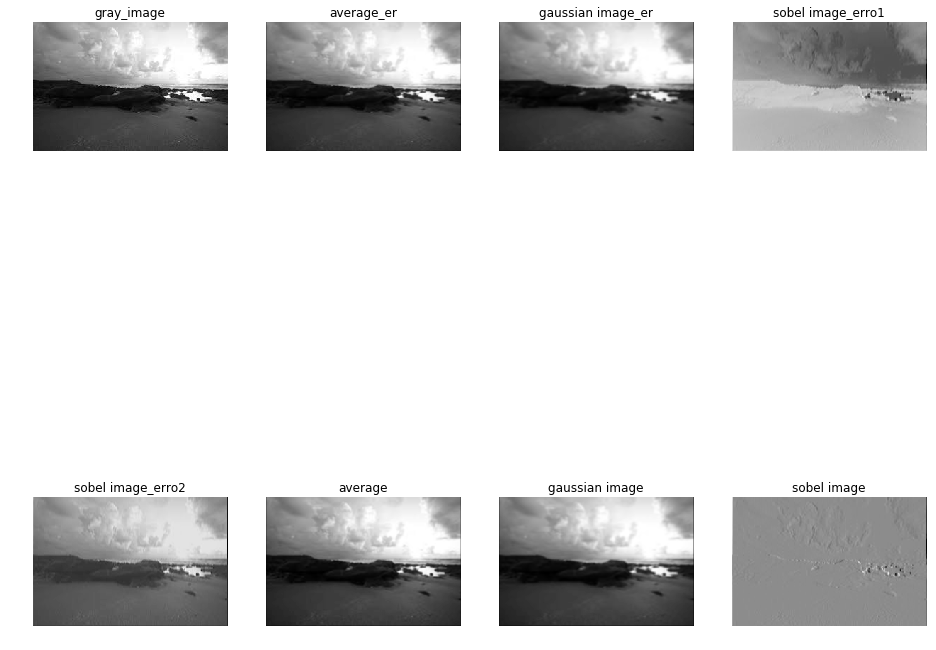

In [16]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image")
plt.imshow(img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("average_er")
plt.imshow(img1,cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("gaussian image_er")
plt.imshow(img2,cmap='gray')
fig.add_subplot(rows, columns, 4)
plt.axis("off")
plt.title("sobel image_erro1")
plt.imshow(img3,cmap='gray')
fig.add_subplot(rows, columns, 5)
plt.axis("off")
plt.title("sobel image_erro2")
plt.imshow(img4,cmap='gray')

fig.add_subplot(rows, columns, 6)
plt.axis("off")
plt.title("average")
plt.imshow(img1_o,cmap='gray')
fig.add_subplot(rows, columns, 7)
plt.axis("off")
plt.title("gaussian image")
plt.imshow(img2_o,cmap='gray')
fig.add_subplot(rows, columns, 8)
plt.axis("off")
plt.title("sobel image")
plt.imshow(img3_o,cmap='gray')


In [20]:
img = cv2.imread('../input/sky2.jpg',0)
print (img.shape)

(781, 1170)


In [21]:
img1 = conv_filter(img,mask1)
img2 = conv_filter(img,mask2)
img3 = conv_filter(img,mask3)
img4 = conv_filter(img,mask4)

img1_o = conv_filter(img,mask1_o)
img2_o = conv_filter(img,mask2_o)
img3_o = conv_filter(img,mask3_o)

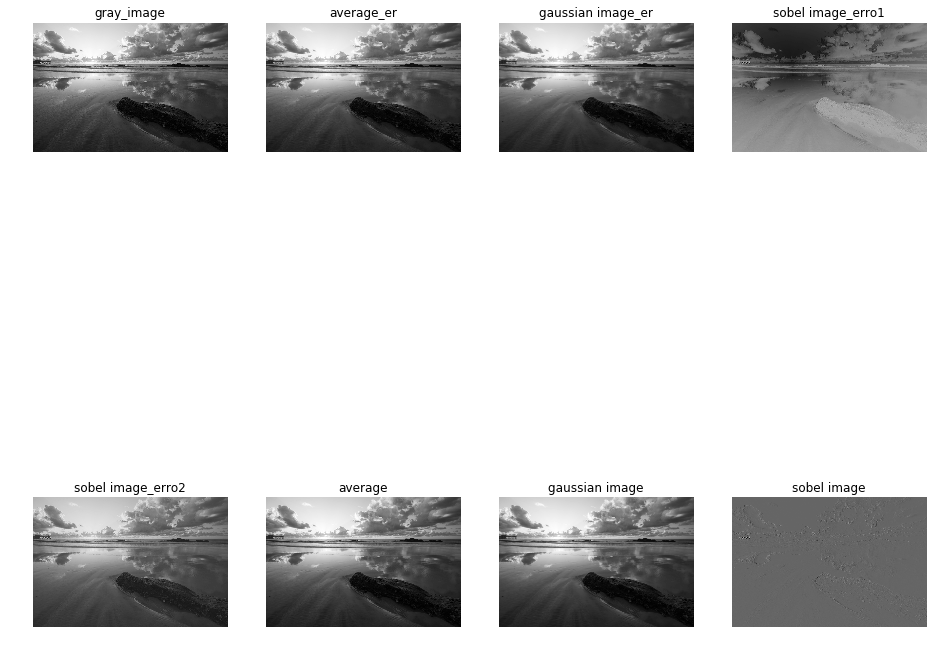

In [22]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("gray_image")
plt.imshow(img,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("average_er")
plt.imshow(img1,cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("gaussian image_er")
plt.imshow(img2,cmap='gray')
fig.add_subplot(rows, columns, 4)
plt.axis("off")
plt.title("sobel image_erro1")
plt.imshow(img3,cmap='gray')
fig.add_subplot(rows, columns, 5)
plt.axis("off")
plt.title("sobel image_erro2")
plt.imshow(img4,cmap='gray')

fig.add_subplot(rows, columns, 6)
plt.axis("off")
plt.title("average")
plt.imshow(img1_o,cmap='gray')
fig.add_subplot(rows, columns, 7)
plt.axis("off")
plt.title("gaussian image")
plt.imshow(img2_o,cmap='gray')
fig.add_subplot(rows, columns, 8)
plt.axis("off")
plt.title("sobel image")
plt.imshow(img3_o,cmap='gray')


### ans 1.2 

In result wise which i observed there is signification error in Sobel operators. Even gaussian image also lokks little distorted  

### ans1 .3
When are trying to create a Blurring Kernel (Namely a weighted mean of the data) we keep the mask sum as one.
This preserves the mean of the filtered image (Think about the DFT, if the sum mask is 1 it's DC gain is 1 which means it keeps the sum of the image which means it keeps the mean value of the image).

When are trying to apply High Pass filter you want to have gain of Zero at the DC Coefficient.
This is done by having the sum of the mask as zero

Read the denition of a nullspace here : http://qr.ae/TUNRfb. Images in the
nullspace of operator A have a particular property. What is it ? (5 points)


Image is null space of A so it will map all the out value to zero according to null space property.

### Ans2.1 

A(I) = I1    is a linear operator as it sattify the additive proprty of linreaity.

assume two images imag1 and img2 and there first row as r1 and r2

A(img1 + img2) = A(img1) + A (img2) = r1+r2 for the operator A, so A is linrea operator 

### Ans 2.2

In [23]:
rows = 100
cols=100

img = np.array([range(10000)])  #       suppose 100x100 image    flaten as 1 x 10000 

img = np.transpose(img)
np.shape(img)


## create A linreat operator A which take flaten I as input and produces 1 row of image 100 values


A = np.zeros((cols,rows*cols))

#Indentity matrix I

I = np.identity(cols)

A[0:cols,0:cols] = I

#get the first row by apply the operator 

row1 = np.dot(A, img)
print (np.transpose(row1))

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
  36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
  54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
  72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
  90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]


### Ans2.3

Image of null space operator A have the property they will produce the output value to zero and they called kernal of operator.



### Ans3
Consider two signals A and B, for linear filter such as mean filter F, F(A+λB)=F(A)+λF(B), but the equation is not satisfied for an nonlinear filter such as the median filter. median violates the additivity rule.

### Answer 4


In [27]:
img = cv2.imread('../input/barbara.jpg',0)
print (img.shape)

(1024, 1024)


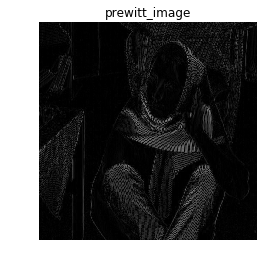

In [28]:
#Operators 

prewitt_x =  np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_y =  np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

I_x = conv_filter(img,prewitt_x)
I_y = conv_filter(img,prewitt_y)

I = np.sqrt(np.power(I_x,2),np.power(I_y,2))
plt.axis("off")
plt.title("prewitt_image")
plt.imshow(I,cmap='gray')


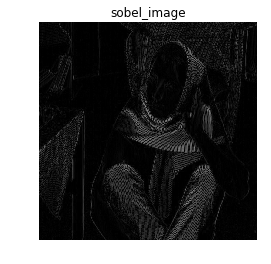

In [29]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y =  np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

I_x = conv_filter(img,sobel_x)
I_y = conv_filter(img,sobel_y)
I = np.sqrt(np.power(I_x,2),np.power(I_y,2))
plt.axis("off")
plt.title("sobel_image")
plt.imshow(I,cmap='gray')

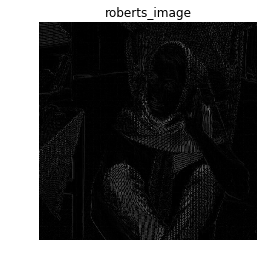

In [30]:
roberts_x = np.array([[0,1],[-1,0]])
roberts_y = np.array([[1,0],[0,-1]])

I_x = conv_filter(img,roberts_x)
I_y = conv_filter(img,roberts_y)

I = np.sqrt(np.power(I_x,2),np.power(I_y,2))
plt.axis("off")
plt.title("roberts_image")
plt.imshow(I,cmap='gray')

-923985.0


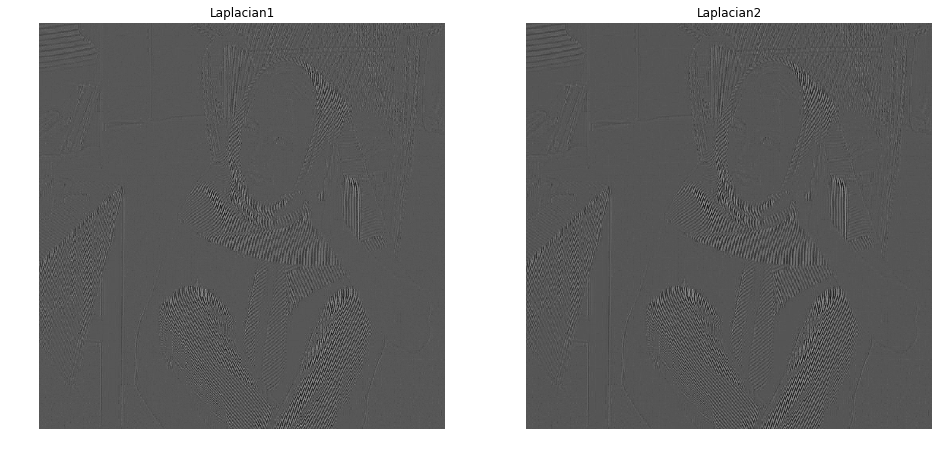

In [31]:
laplace1 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
laplace2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

I1 = conv_filter(img,laplace1)
I2 = conv_filter(img,laplace2)

fig=plt.figure(figsize=(16, 16))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Laplacian1")
plt.imshow(I1,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("Laplacian2")
plt.imshow(I2,cmap='gray')

print(np.sum(np.ravel(I1-I2)))


### Q9

In [13]:
import math
def move_avg_filter(img,k):
    
    [rows,cols] = img.shape
    out_img = np.zeros([rows,cols],dtype='float')
    mask = np.ones([k,k])/np.power(k,2)
    
    
    
    window_size = mask.shape
    
    
    
    PadM=math.floor((window_size[0])/2)
    PadN=math.floor((window_size[1])/2)
    pad_img = []
    ##FIND THE NUMBER OF ROWS AND COLUMNS TO BE PADDED WITH ZERO

    print (PadM,PadN)
    pad_img = np.pad(img,[PadM,PadN],'constant', constant_values=(0, 0))
    [rows1,cols1] = pad_img.shape
    #print (pad_img.shape)
    
    for i in range(PadM,rows1-PadM):
        for j in range(PadN,cols1-PadN):
            
            # get the PadMxPadN windows
            if (k % 2 == 0):
                window = pad_img[i-PadM:i+PadM,j-PadN:j+PadN]
            else:    
                
                window = pad_img[i-PadM:i+PadM+1,j-PadN:j+PadN+1]
            #if((i==0)|(j==0)):
            value = np.sum(np.ravel(np.multiply(mask,window)))
            #temp_value = np.multiply(mask,window)
            out_img[i-PadM,j-PadN] = value
    return out_img       

1 1


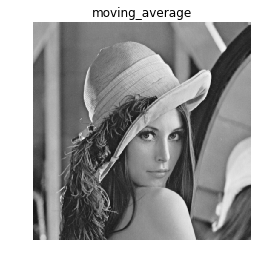

In [14]:
I = move_avg_filter(img,2)
plt.axis("off")
plt.title("moving_average")
plt.imshow(I,cmap='gray')

### bilitarera filter 

In [33]:
import math
def bilateral_filter(img, window_size, sigmad, sigmar):
    
    [rows,cols] = img.shape
    
    out_img = np.zeros([rows,cols],dtype='float')
    n = math.floor(window_size[0]/2)
    m = math.floor(window_size[1]/2)
    
    for i in range(n,rows-n-1):
        for j in range(m,cols-m-1):
            
            #print(i,j)
            temp_w = 0
            temp_wI = 0
            for k in range(window_size[0]):
                for l in range(window_size[1]):
                    
                    k1 = k - n
                    l1 = l - m
                    #print(k1,l1)
                    temp_w1 =  np.exp((-(np.power((k1),2) + np.power((l1),2))/2*sigmad) - (np.power(abs(img[i,j]-img[i+k1,j+l1]),2)/2*sigmar))
                    temp_w = temp_w1+temp_w
                    
                    temp_wI1 = temp_w1 * img[i+k1,j+l1]
                    temp_wI = temp_wI + temp_wI1
            #print (temp_w,temp_wI)
            out_img[i,j] = round(temp_wI/temp_w)
            
    return out_img
        
        

In [34]:
def distance(x, y, i, j):
    return np.sqrt((x-i)**2 + (y-j)**2)


def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (x ** 2) / (2 * sigma ** 2))


import math
def bilateral_filter1(img, window_size, sigmad, sigmar):
    
    [rows,cols] = img.shape
    
    out_img = np.zeros([rows,cols],dtype='float')
    n = math.floor(window_size[0]/2)
    m = math.floor(window_size[1]/2)
    
    for i in range(n,rows-n-1):
        for j in range(m,cols-m-1):
            
            #print(i,j)
            temp_w = 0
            temp_wI = 0
            for k in range(window_size[0]):
                for l in range(window_size[1]):
                    
                    k1 = i - (n- k)
                    l1 = j - (m - l)
                    g_i = gaussian(img[k1][l1] - img[i][j], sigmar)
                    g_d = gaussian(distance(k1, l1, i, k), sigmad)
                    temp_w1 = g_i*g_d
                    temp_w = temp_w1+temp_w
                    
                    temp_wI1 = temp_w1 * img[k1,l1]
                    temp_wI = temp_wI + temp_wI1
            #print (temp_w,temp_wI)
            out_img[i,j] = (round(temp_wI/temp_w))
            
    return out_img
        
        

(850, 1280)


C:\Users\kandpani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in ubyte_scalars


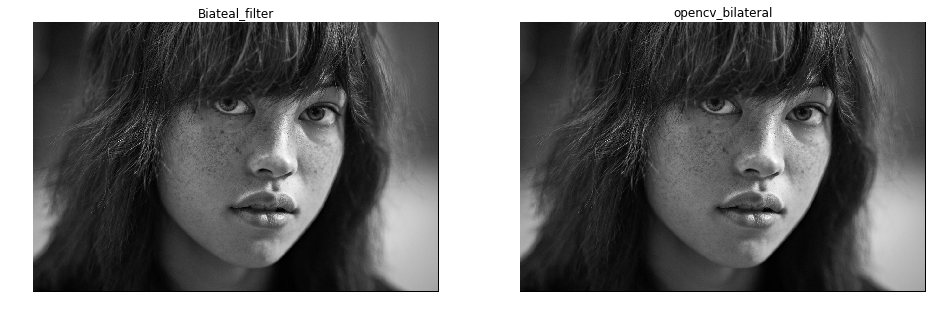

In [35]:
img = cv2.imread('../input/face.jpg',0)
print (img.shape)

I = bilateral_filter(img, [3,3],75, 75)

blur = cv2.bilateralFilter(img,3,75,75)
#I = bilateral_filter(img, [3,3],75, 75)
fig=plt.figure(figsize=(16, 16))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title('Biateal_filter')
plt.imshow(I,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("opencv_bilateral")
plt.imshow(I,cmap='gray')


 ### ans 10.2
 HBF image = k(original image) – LPF image
 
 In Bilateral filter discontinuty pixels becomes more shaper and and in Higbost filtering overall image becomes sharper.
 

(850, 1280)


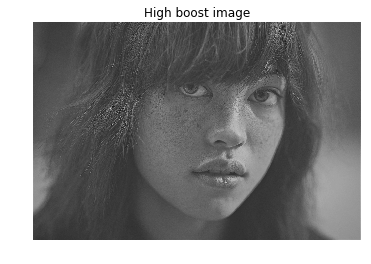

In [37]:
img = cv2.imread('../input/face.jpg',0)
print (img.shape)

mask2_o = (1/256.0)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,36],[4,16,24,16,4],[1,4,6,4,1]])

LP_img = conv_filter(img,mask2_o)

HBP_image = 2.0*img - LP_img

plt.axis("off")
plt.title("High boost image")
plt.imshow(HBP_image,cmap='gray')

C:\Users\kandpani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in ubyte_scalars


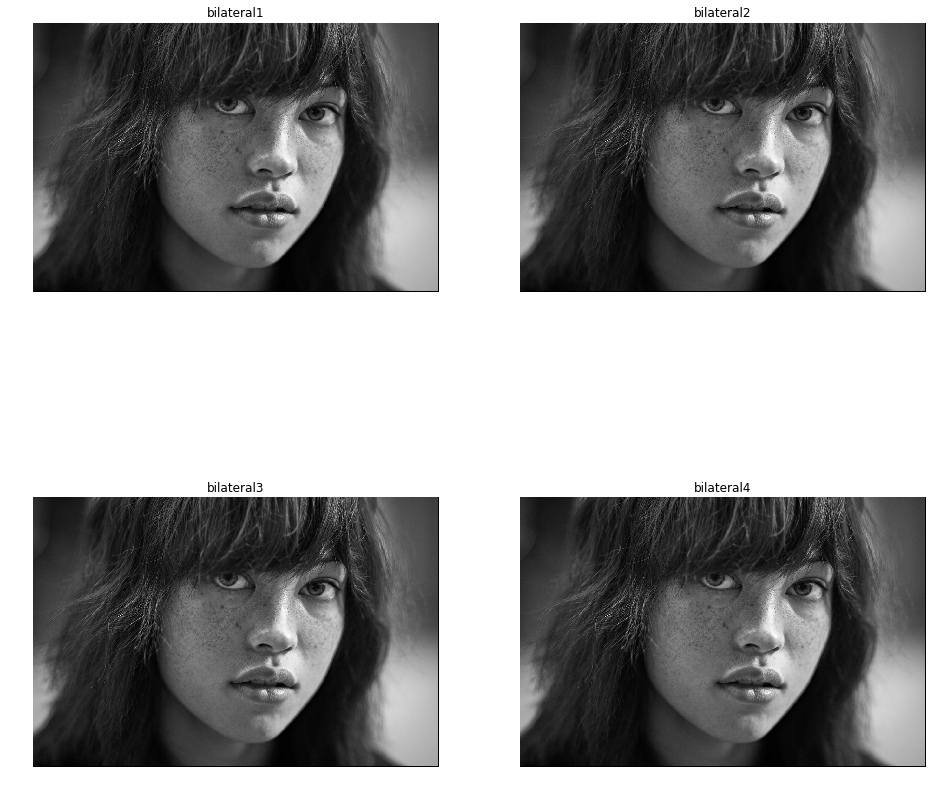

In [38]:
### show the table
I1 = bilateral_filter(img, [3,3],12, 16)

I2 = bilateral_filter(img, [3,3],50, 10)

I3 = bilateral_filter(img, [3,3],50, 50)

I4 = bilateral_filter(img, [3,3],100, 100)


fig=plt.figure(figsize=(16, 16))
columns = 2
rows = 2
fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("bilateral1")
plt.imshow(I1,cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("bilateral2")
plt.imshow(I2,cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.axis("off")
plt.title("bilateral3")
plt.imshow(I3,cmap='gray')
fig.add_subplot(rows, columns, 4)
plt.axis("off")
plt.title("bilateral4")
plt.imshow(I4,cmap='gray')
